<h1 style="align-text:center;">Variación de Indicadores entre dos periodos</h1>

In [10]:
import requests

def menu():
    print("\nMenú indicadores:")
    print("1. IPC")
    print("2. UF")
    print("3. UTM")
    return int(input("Ingrese su opción: "))

opcion = 4
opciones = [1, 2, 3]
while (opcion in opciones) != True:
    opcion = int(menu())

if opcion == 1:
    indice = "ipc"
elif opcion == 2:
    indice = "uf"
elif opcion == 3:
    indice = "utm"

year_since = 1
year_until = 0

while year_since >= year_until:
    year_since = int(input("Ingrese año de incio: "))
    year_until = int(input("Ingrese año de termino: "))

endpoint = "https://api.sbif.cl/api-sbifv3/recursos_api/" + indice + "/periodo/"
apikey = "1676b1bd9d8078fb2a25735eca7e31d7a53f0b93"
parametros = {"apikey": apikey, "formato":"json"}
url = endpoint + str(year_since) + "/" + str(year_until)

respuesta = requests.get(url, params = parametros)
respuesta = respuesta.json()

if "CodigoError" in respuesta:
    print("Error en la consulta:", respuesta["Mensaje"])
else: 
    nombre_archivo = indice.upper()
    archivo = open(nombre_archivo + ".txt", "w")

    for llave in respuesta[nombre_archivo + "s"]:
        archivo.write(str(llave) + "\n")
    archivo.close()
    print("¡Archivo generado!")


Menú indicadores:
1. IPC
2. UF
3. UTM
Ingrese su opción: 1
Ingrese año de incio: 2018
Ingrese año de termino: 2019
¡Archivo generado!


In [11]:
from ast import literal_eval
import statistics

lista_valor = list()
lista_fecha = list()
docu = open(nombre_archivo + ".txt", "r")
for linea in docu:
    lista = literal_eval(linea)
    valor = lista["Valor"].replace(".","")
    lista_valor.append(float(valor.replace(",", ".")))
    fecha = str(lista["Fecha"]).split("-")
    dia = fecha[2]
    mes = fecha[1]
    anio = fecha[0]
    lista_fecha.append(dia + "-" + mes + "-" + anio)
docu.close()
promedio = round(statistics.mean(lista_valor), 2)
print("El promedio de", nombre_archivo, "entre el", year_since, "y el", year_until, "fue de", f'{promedio:,.2f}')
desviacion = statistics.stdev(lista_valor)
print("La desviación estándar de la muestra es", f'{desviacion:,.2f}')

El promedio de IPC entre el 2018 y el 2019 fue de 0.23
La desviación estándar de la muestra es 0.19


<IPython.core.display.Javascript object>


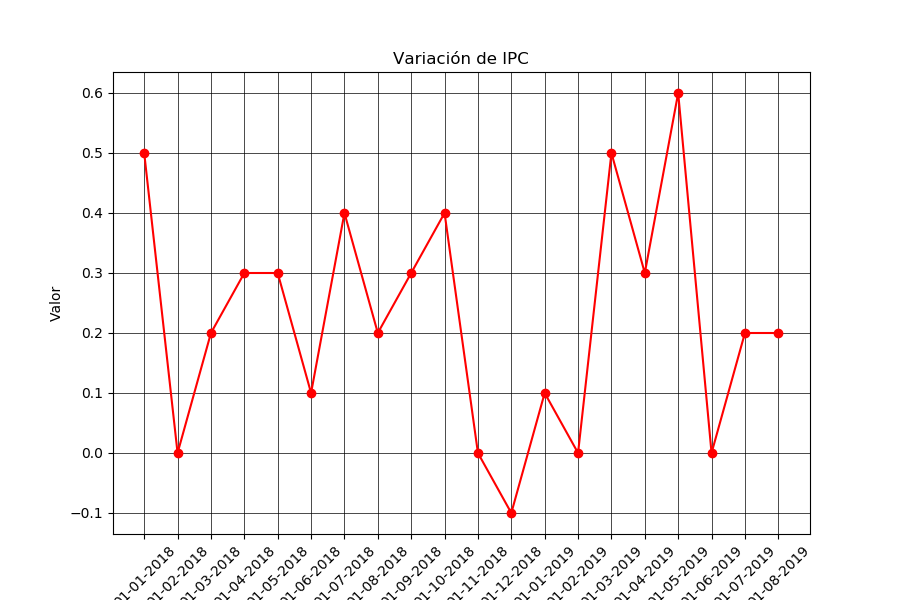

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.grid(color='black', linestyle="-", linewidth=0.5)
plt.plot(lista_fecha, lista_valor, '-ro')
plt.title("Variación de " + nombre_archivo)
plt.xticks([i for i in range(len(lista_valor))], rotation = 45)
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.show()